In [1]:
"""
Description: Inspection and visualization of the 'sleep-export2.csv' file.
File source: downloaded from link in ./instructions.ipynb (see Part 2)

App Source: https://developer.samsung.com/onlinedocs/health/index.html?com/samsung/android/sdk/healthdata/HealthConstants.html
"""

"\nDescription: Inspection and visualization of the 'sleep-export2.csv' file.\nFile source: downloaded from link in ./instructions.ipynb (see Part 2)\n\nApp Source: https://developer.samsung.com/onlinedocs/health/index.html?com/samsung/android/sdk/healthdata/HealthConstants.html\n"

In [2]:
#General imports 
import sys
import os
from datetime import datetime, timedelta, date
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator
from retrieve_time import Retrieve_Timestamps
%matplotlib inline

In [3]:
#Set matplotlib variables for prettier plots.
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
fs = 36.

In [4]:
#Initialize relevant variables
M = {}
time_format = '%Y-%m-%d %H:%M:%S.%f'

## Collect and treat the data

In [8]:
#Read the sleep data.
fpath = './../data/exercise.csv'
data = pd.read_csv(fpath, header=0, index_col=0, low_memory=False)
print(data.head(n=10))
#print(data.shape)
print(data.columns)


                  end_time  altitude_loss  max_altitude  \
0  2018-04-07 17:40:40.673            NaN           NaN   
1  2018-01-27 10:08:00.000            NaN           NaN   
2  2018-05-01 18:12:20.915            NaN           NaN   
3  2018-02-24 13:50:02.929            NaN           NaN   
4  2018-03-16 17:25:39.584            NaN           NaN   
5  2018-05-01 17:46:01.000            NaN           NaN   
6  2018-03-16 08:01:07.000            NaN           NaN   
7  2017-12-29 16:41:21.980            NaN           NaN   
8  2018-02-28 08:04:01.482            NaN           NaN   
9  2018-04-22 08:58:38.605            NaN           NaN   

                start_time  count  altitude_gain  exercise_custom_type  \
0  2018-04-07 17:26:10.149    NaN            NaN                   NaN   
1  2018-01-27 09:38:00.000    0.0            NaN                   NaN   
2  2018-05-01 18:01:24.059    NaN            NaN                   NaN   
3  2018-02-24 13:35:13.243    NaN            NaN      

In [14]:
#Sort dictionary based on the 'start_time' column.
#Create datetime objects and collect the bedtime hours.
starttime_obj = Retrieve_Timestamps(
  data['start_time'].values, data['time_offset'].values, 'UTC', 'datestr', time_format).out
endtime_obj = Retrieve_Timestamps(
  data['end_time'].values, data['time_offset'].values, 'UTC', 'datestr', time_format).out

print('Start date: ', (min(starttime_obj)))
print('End date: ', (max(starttime_obj)))

data['start_hour'] = np.array([t.hour + t.minute/60. + t.second/3600. for t in starttime_obj])

ref_date = min(starttime_obj)
time_prog = starttime_obj - ref_date
data['time_prog'] = np.array([t.days + t.seconds/86400. for t in time_prog]) #In days

data.sort_values(by ='time_prog', inplace=True)

Start date:  2016-06-25 04:28:30.517000-06:00
End date:  2018-05-03 05:04:31-03:00


/home/heringer/anaconda2/envs/py37/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/heringer/anaconda2/envs/py37/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


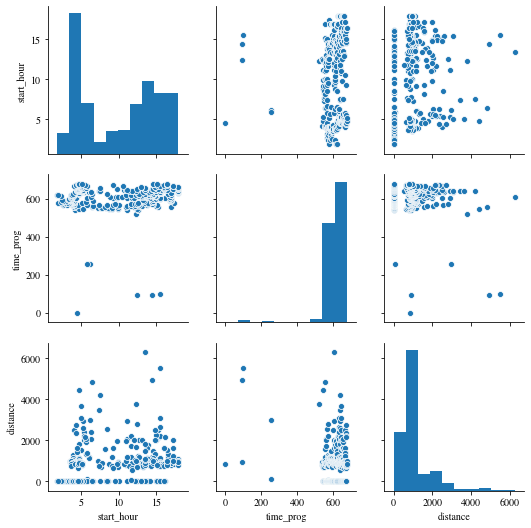

In [15]:
#Select relevant columns and make corner plot.
pair_cols = ['start_hour', 'time_prog', 'distance']
g = sns.pairplot(data, vars=pair_cols)